In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32, 3)))

# 모델의 모든 층을 고정
for layer in base_model.layers:
    layer.trainable = False

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)


169001437/169001437 [==============================] - 4s 0us/step


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
782/782 [==============================] - 21s 13ms/step - loss: 4.2018 - accuracy: 0.0756 - val_loss: 4.0633 - val_accuracy: 0.0953
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 3.9308 - accuracy: 0.1095 - val_loss: 4.0054 - val_accuracy: 0.1024
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 3.8097 - accuracy: 0.1282 - val_loss: 3.9803 - val_accuracy: 0.1090
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 3.7119 - accuracy: 0.1444 - val_loss: 3.9809 - val_accuracy: 0.1080
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 3.6202 - accuracy: 0.1658 - val_loss: 3.9808 - val_accuracy: 0.1105
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 3.5388 - accuracy: 0.1799 - val_loss: 4.0073 - val_accuracy: 0.1093
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 3.

Epoch 1/10
782/782 [==============================] - 14s 18ms/step - loss: 3.1926 - accuracy: 0.2566 - val_loss: 4.1396 - val_accuracy: 0.1077
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 3.1350 - accuracy: 0.2711 - val_loss: 4.1848 - val_accuracy: 0.1070
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 3.0804 - accuracy: 0.2839 - val_loss: 4.2323 - val_accuracy: 0.1046
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 3.0304 - accuracy: 0.2958 - val_loss: 4.2709 - val_accuracy: 0.1043
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 2.9807 - accuracy: 0.3067 - val_loss: 4.3212 - val_accuracy: 0.1036
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 2.9357 - accuracy: 0.3208 - val_loss: 4.3673 - val_accuracy: 0.1034
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 2.8933 - accuracy: 0.3291 - val_loss: 4.4057 - val_accuracy: 0.10

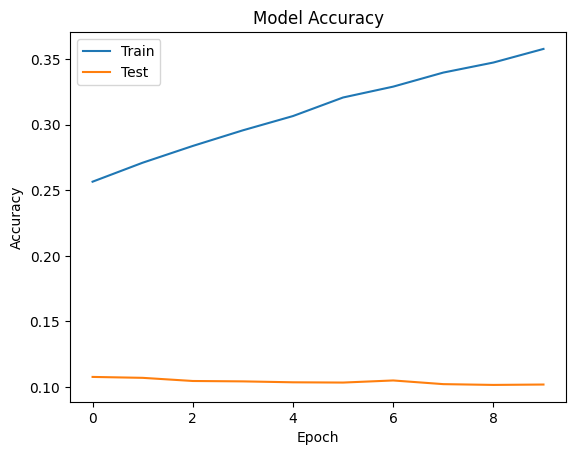

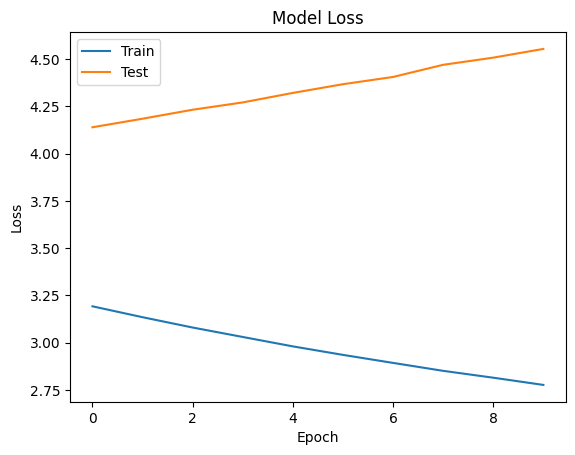

In [ ]:
import matplotlib.pyplot as plt

# 모델 훈련 및 히스토리 저장
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

# 사전 훈련된 MobileNetV2 모델 로드
model = MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 0s 0us/step


### 이미지 확인 <br>
1. 구글드라이브에 원하는 이미지를 업로드한다.<br>
2. 업로드한 이미지를 우클릭하여 공유가능한 링크 가져오기를 클릭 <br>
   이때 권한을 '링크가 있는 모든 사용자에게 공개'로 변환<br>
3. 예시 링크 <br>
https://drive.google.com/file/d/13473X3IG8VpKdxhO9E5JkA810Gz6ngd4/view?usp=sharing <br>
4. 여기서 img id를 가져오기 <br>
13473X3IG8VpKdxhO9E5JkA810Gz6ngd4 가 이미지 아이디에 해당 <br>
5. 텍스트 셀을 추가한 후 <br>
img src = "https://drive.google.com/uc?export=view&id=13473X3IG8VpKdxhO9E5JkA810Gz6ngd4" height = "" width ="" 의 내용을 html 문법으로 작성 <br>

<img src = "https://drive.google.com/uc?export=view&id=1aUi3iOsHvvmNC2WydZkDxF0XKCdztt2I" height = '500' width = ''> <br>

In [ ]:
# 이미지를 로드하고 전처리
img = image.load_img('dolphin.jpg', target_size=(224, 224))  # MobileNetV2의 기본 입력 크기에 맞게 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 이미지에 대한 예측 수행
predictions = model.predict(img_array)

# 예측 결과 해석
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 0s 23ms/step
1: sea_lion (0.10)
2: grey_whale (0.10)
3: albatross (0.04)


<img src = "https://drive.google.com/uc?export=view&id=1dtTmmdUns_-XvN__HRRsiwZWPV_Y3lGS" height = '' width = ''> <br>

In [ ]:
# 이미지를 로드하고 전처리
img = image.load_img('fish.png', target_size=(224, 224))  # MobileNetV2의 기본 입력 크기에 맞게 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 이미지에 대한 예측 수행
predictions = model.predict(img_array)

# 예측 결과 해석
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 0s 35ms/step
1: goldfish (0.97)
2: rock_beauty (0.00)
3: anemone_fish (0.00)
